<a href="https://colab.research.google.com/github/Amelaouadni/linear-regression-/blob/main/lineairRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path_data = '/content/sample_data/RealEstate_Paris_cleaned_17_12_2019.csv' 
df=pd.read_csv(path_data)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape


(21121, 32)

In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'id_mutation', 'date_mutation',
       'nature_mutation', 'valeur_fonciere', 'adresse_numero',
       'adresse_suffixe', 'adresse_nom_voie', 'adresse_code_voie',
       'code_postal', 'code_commune', 'nom_commune', 'code_departement',
       'lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez',
       'lot4_surface_carrez', 'lot5_surface_carrez', 'nombre_lots',
       'code_type_local', 'type_local', 'surface_reelle_bati',
       'nombre_pieces_principales', 'code_nature_culture', 'nature_culture',
       'surface_terrain', 'longitude', 'latitude', 'année', 'mois',
       'duplicated'],
      dtype='object')

In [ ]:
df.head(1)

,Unnamed: 0,index,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_surface_carrez,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,année,mois,duplicated
0,752156,2289411,2018-987606,2018-01-04,Vente,1202000.0,10.0,NaN,AV PERCIER,7250,75008.0,75108,Paris 8e Arrondissement,75,159.2,NaN,NaN,NaN,NaN,3,2.0,Appartement,120.0,2.0,NaN,NaN,NaN,2.315005,48.874705,2018,1,False


# Analyse préliminaire:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21121 entries, 0 to 21120
Data columns (total 32 columns):
Unnamed: 0                   21121 non-null int64
index                        21121 non-null int64
id_mutation                  21121 non-null object
date_mutation                21121 non-null object
nature_mutation              21121 non-null object
valeur_fonciere              21121 non-null float64
adresse_numero               21121 non-null float64
adresse_suffixe              803 non-null object
adresse_nom_voie             21097 non-null object
adresse_code_voie            21121 non-null object
code_postal                  21121 non-null float64
code_commune                 21121 non-null int64
nom_commune                  21121 non-null object
code_departement             21121 non-null int64
lot1_surface_carrez          14137 non-null float64
lot2_surface_carrez          3834 non-null float64
lot3_surface_carrez          333 non-null float64
lot4_surface_carrez        

In [ ]:
df.dropna(axis=0,subset=['surface_reelle_bati'], thresh=None, inplace=True)

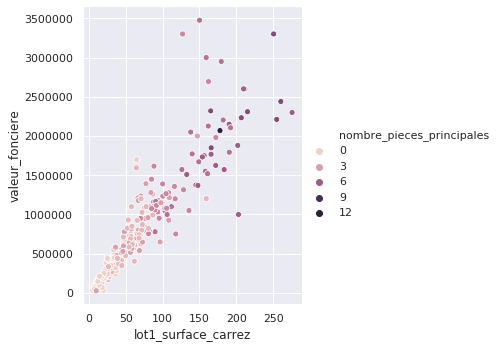

In [ ]:

sns.set()
data= df[df['code_commune']==75108]
sns.relplot( x="lot1_surface_carrez",y="valeur_fonciere",hue="nombre_pieces_principales",data=data)


Le nombre de pièces principales à un effet sur la regression

In [ ]:
df['nombre_lots'].value_counts()


2     9816
1     9610
3     1146
4      352
5      107
6       40
7       21
8       12
9        5
10       3
0        3
15       1
13       1
12       1
11       1
17       1
Name: nombre_lots, dtype: int64

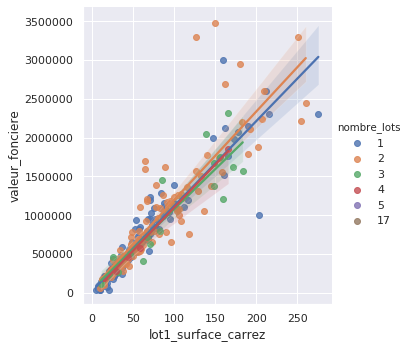

In [ ]:
sns.lmplot( x="lot1_surface_carrez",y="valeur_fonciere",hue="nombre_lots",data=data)


Le nombre de lots n'a pas un grand impact sur la regression

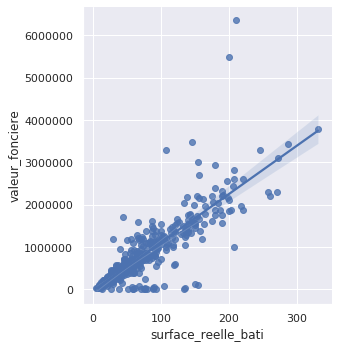

In [ ]:
sns.lmplot( x="surface_reelle_bati",y="valeur_fonciere",data=data)


In [ ]:
q=data['valeur_fonciere'].quantile(0.5)
q1=data['valeur_fonciere'].quantile(0.95)

In [ ]:
data=data[(data['valeur_fonciere']<q1) & (data['valeur_fonciere']>q) ]

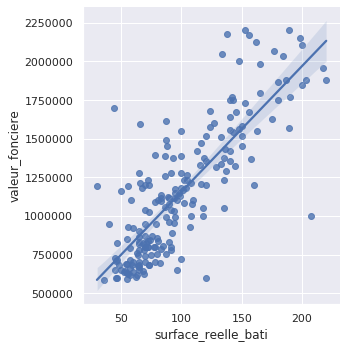

In [ ]:
sns.lmplot( x="surface_reelle_bati",y="valeur_fonciere",data=data)


In [ ]:
data.shape

(201, 32)

In [ ]:
data2=df[df['code_commune']==75118]

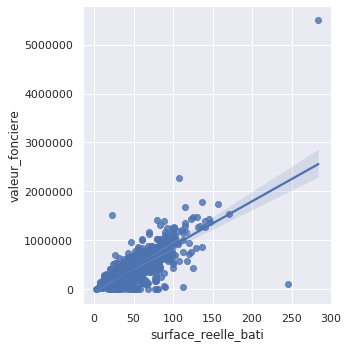

In [ ]:
sns.lmplot( x="surface_reelle_bati",y="valeur_fonciere",data=data2)


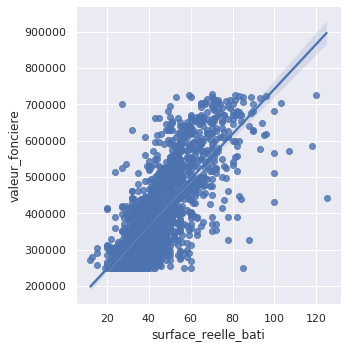

In [ ]:
q2=data2['valeur_fonciere'].quantile(0.4)
q3=data2['valeur_fonciere'].quantile(0.95)
data3=data2[(data2['valeur_fonciere']<q3) & (data2['valeur_fonciere']>q2) ]
sns.lmplot( x="surface_reelle_bati",y="valeur_fonciere",data=data3)


In [ ]:
data3.shape

(1705, 32)

In [ ]:
data3.head(1)

,Unnamed: 0,index,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_surface_carrez,lot5_surface_carrez,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,surface_terrain,longitude,latitude,année,mois,duplicated
13911,768401,2322299,2018-1010229,2018-01-08,Vente,282000.0,3.0,NaN,RUE AUDRAN,0531,75018.0,75118,Paris 18e Arrondissement,75,27.02,NaN,NaN,NaN,NaN,2,2.0,Appartement,28.0,2.0,NaN,NaN,NaN,2.335603,48.885157,2018,1,False


In [ ]:
data3['adresse_suffixe'].value_counts()

B    58
T    11
C     1
Name: adresse_suffixe, dtype: int64

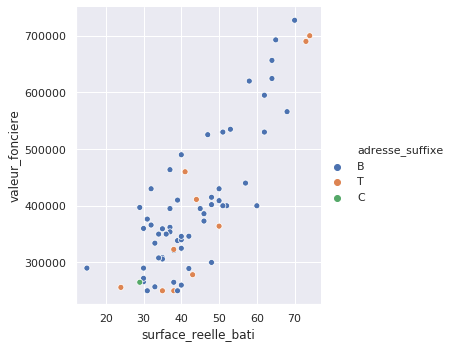

In [ ]:
sns.relplot( x="surface_reelle_bati",y="valeur_fonciere",hue='adresse_suffixe',data=data3)


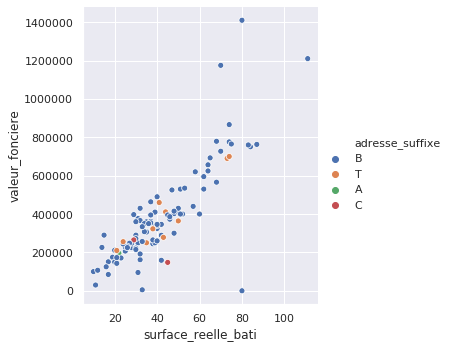

In [ ]:
sns.relplot( x="surface_reelle_bati",y="valeur_fonciere",hue='adresse_suffixe',data=data2)


In [ ]:
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
variable_dep = ['valeur_fonciere']
dimension= ['surface_reelle_bati']

sklearn lineair regression


In [ ]:
y = df[variable_dep].values.reshape(-1,1)
x =df[dimension].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, train_size=0.8)



In [ ]:
df.shape

(21120, 32)

In [ ]:
reg_sklearn = linear_model.LinearRegression().fit(x_train, y_train)

y_pred_train_sklearn = reg_sklearn.predict(x_train)
y_pred_test_sklearn = reg_sklearn.predict(x_test)

In [ ]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_pred_test_sklearn, y_test))

Mean squared error: 66459642562.93


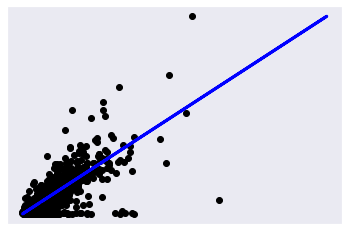

In [ ]:
plt.scatter(y_pred_test_sklearn, y_test,  color='black')
plt.plot(y_test, y_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()